In [55]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import pandas as pd


In [56]:

df = pd.read_csv('../../data/data_daily_with_aqi.csv')
df.set_index(pd.DatetimeIndex(df['date']), inplace=True)
target = 'AQI'
city ='北京'
df_tgt = df[df.type==target].drop('type',axis=1)
df_tgt_ct = df_tgt[['date',city]].rename(columns={'date':'ds',city:'y'})
df_tgt_ct = df_tgt_ct.dropna()

In [57]:
y = df_tgt_ct.resample('M').mean()

In [58]:
y = y.reset_index(drop=True)

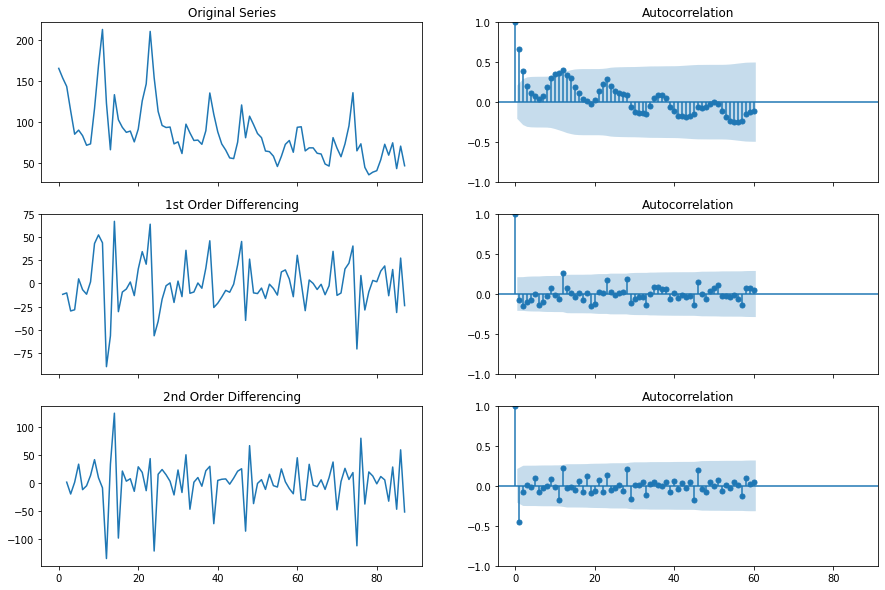

In [63]:
# Original Series
fig, axes = plt.subplots(3, 2, figsize=(15,10),sharex=True)
axes[0, 0].plot(y); axes[0, 0].set_title('Original Series')
plot_acf(y, ax=axes[0, 1],lags=60)

# 1st Differencing
axes[1, 0].plot(y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y.diff().dropna(), ax=axes[1, 1],lags=60)

# 2nd Differencing
axes[2, 0].plot(y.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y.diff().diff().dropna(), ax=axes[2, 1],lags=60)

plt.show()

In [66]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(y, order=(4,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   88
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -398.499
Date:                Mon, 16 May 2022   AIC                            810.998
Time:                        22:35:40   BIC                            828.260
Sample:                             0   HQIC                           817.949
                                 - 88                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3444      0.208      6.471      0.000       0.937       1.752
ar.L2         -0.6327      0.202     -3.139      0.002      -1.028      -0.238
ar.L3          0.0881      0.191      0.461      0.6

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


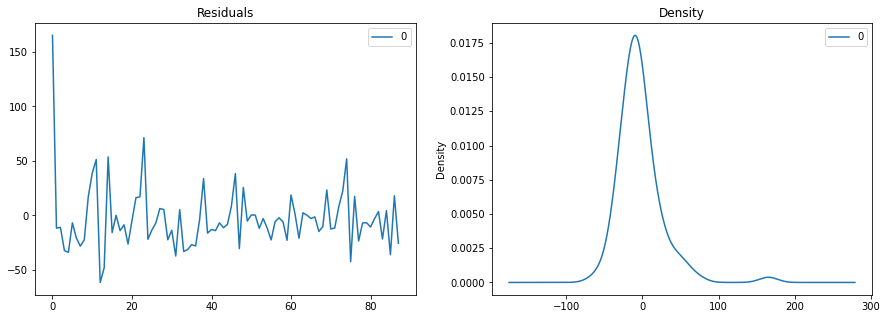

In [67]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2,figsize=(15,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()